# Exercício PA2-6

Exercício com data de entrega para 16 de novembro de 2020.


Aluno: Noé de Lima Bezerra

<noe_lima@id.uff.br>

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Math, Image, IFrame
#from sympy.abc import x, y, z
sp.init_printing(use_latex='mathjax',latex_mode='equation*')

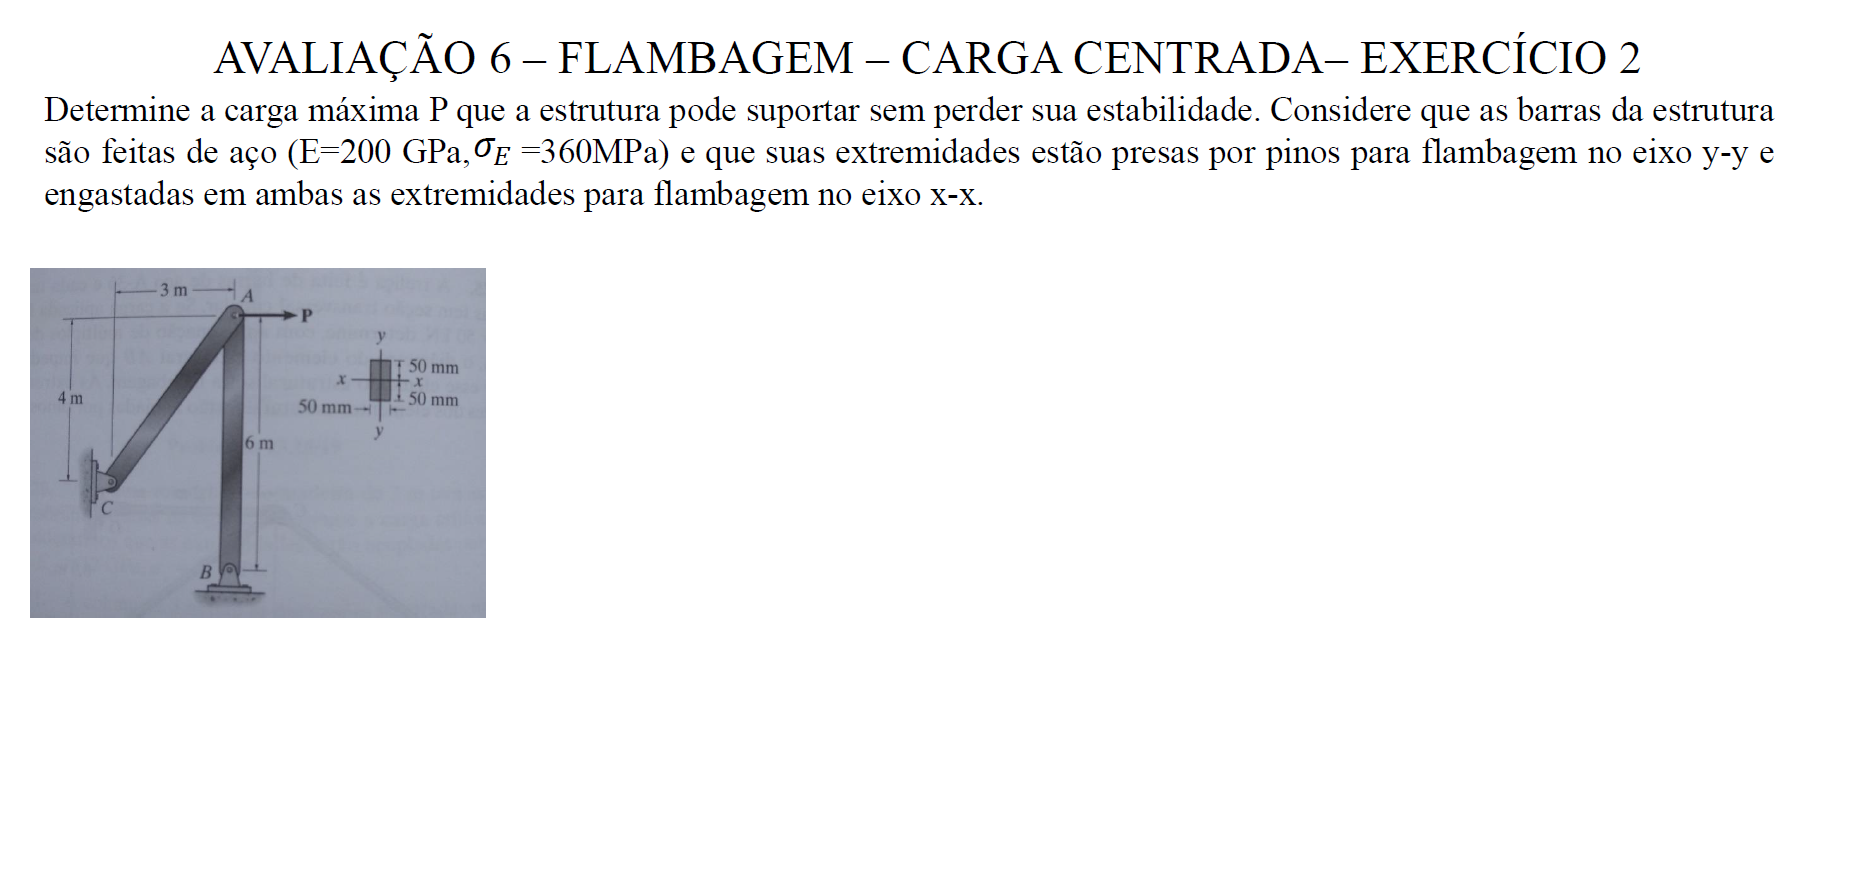

In [2]:
Image("Figuras/PA2-6.png")

# Introdução

O índice de esbeltez de uma coluna é definido por $\frac{L_{e}}{r}$, onde:

* $L_{e}$ é o comprimento efetivo, definido em funcão do tipo de apoio (condições de contorno);

* $r$ é o raio de giração, definido por $r = \sqrt{\frac{I}{A}}$, sendo $I$ o menor momento de inércia da seção transversal e $A$ a área desta seção.

Para colunas de aço, temos:

* Colunas extra longas, $200 \lt \frac{L_{e}}{r}$, não é recomendado para colunas de aço;

* Colunas longas, $C_{C} \le \frac{L_{e}}{r} \le 200$, fórmula de Euler utilizando Coeficiente de Segurança $C.S.=1,92$. Ou seja:

\begin{equation*}
    \sigma_{adm} = \frac{\sigma_{Cr}}{C.S.} =
    \frac{\pi^{2}E}{1,92\left(\frac{L_{e}}{r}\right)^{2}}
\end{equation*}

* Colunas curtas ou intermediárias, $\frac{L_{e}}{r} \le C_{Cr}$, fórmula empírica:

\begin{equation*}
    \sigma_{adm} = \frac{\sigma_{Cr}}{C.S.} =
    \frac{\sigma_{E}}{C.S.}\left[1-\frac{1}{2}\left(\frac{\frac{L_{e}}{r}}{C_{Cr}}\right)^{2}\right]
\end{equation*}

Para o coeficiente de segurança calculado conforme equação abaixo:

\begin{equation*}
    C.S. = \frac{5}{3} + \frac{3}{8}\frac{\frac{L_{e}}{r}}{C_{Cr}} - \frac{1}{8}\left(\frac{\frac{L_{e}}{r}}{C_{Cr}}\right)^{3}
\end{equation*}

Onde:

\begin{equation*}
    C_{Cr}^{2} = \frac{2\pi^{2}E}{\sigma_{E}}
\end{equation*}

# Solução

Abaixo, temos a definição simbólica para as unidades que serão utilizadas na solução: $mm$, $MPa$ e $kN$.

In [3]:
mm,MPa,kN = sp.symbols("mm,MPa,kN", positive=True)

A seguir, a atribuição das constantes dadas $E=200~GPa$ e $\sigma_{E}=360~MPa$, bem como o cálculo da área da seção transversal. Em seguida uma função que calcula o momento de inércia para uma seção retangular e, por fim, uma função para calcular o raio de giração em função do momento de inércia e da área.

In [4]:
E = 200*1000*MPa
sigma_E = 360*MPa
A = 50*mm*100*mm
def I_rect(b,h):
    return b*(h**3)/12
def r_g(I,A):
    return sp.sqrt(I/A)

A função abaixo calcula a tensão admissível $\sigma_{adm}$ para uma coluna de aço em função de $L_e$, $r$, $\sigma_{E}$ e $E$.

In [5]:
def sigma_aco(L_e,r,sigma_E,E):
    esb = L_e/r
    C_C = sp.sqrt(2*(sp.pi**2)*E/sigma_E)
    if esb > 200:
        return
    if esb > C_C:
        CS = 5/3 + (3/8)*(esb/C_C) - (1/8)*(esb/C_C)**3
        return (sigma_E/CS)*(1 - (1/2)*(esb/C_C)**2)
    else:
        CS = 192/100
        return (E/CS)*(sp.pi/esb)**2
def sigma_adm(L_e,r,sigma_E,E):
    esb = L_e/r
    return E*(sp.pi/esb)**2

As relações de equilíbrio nos fornecem:

* $\sum_{F_{x}}=0\therefore R_{Cx} + R_{Bx} + P = 0$

* $\sum_{F_{y}}=0\therefore R_{Cy} + R_{By} = 0$

* $\sum_{MA}=0\therefore -R_{Cy}\times 3 + R_{Cx}\times 4 = 0$

* $\sum_{MA}=0\therefore R_{Bx}\times 6 = 0$

In [6]:
P = sp.symbols('P')
K = sp.Matrix([[1,0,1,0],[0,1,0,1],[0,0,4,-3],[6,0,0,0]])
f = sp.Matrix([[-P],[0],[0],[0]])
display(K.solve(f))

⎡  0  ⎤
⎢     ⎥
⎢ 4⋅P ⎥
⎢ ─── ⎥
⎢  3  ⎥
⎢     ⎥
⎢ -P  ⎥
⎢     ⎥
⎢-4⋅P ⎥
⎢─────⎥
⎣  3  ⎦

Ou seja:

* $R_{Ax} = 0$

* $R_{Ay} = \frac{4}{3}P$

* $R_{Cx} = -P$

* $R_{Cy} = -\frac{4}{3}P$

Considerando $P\gt 0$, temos que considerar a flambagem apenas na coluna $AB$, já que, neste caso, a barra $AC$ sofre tração.

Temos, pelas relações de equilíbrio, $P_{AB}=\frac{4}{3}P$. Logo, $P_{max} = \frac{3}{4}A\sigma_{adm}$

In [7]:
r_x = r_g(I_rect(50*mm,100*mm),A)
r_y = r_g(I_rect(100*mm,50*mm),A)
display(r_x,r_y)

50⋅√3⋅mm
────────
   3    

25⋅√3⋅mm
────────
   3    

O comprimento efetivo $L_e$ será o comprimento $L$ da coluna na direção $yy$, pois neste caso ela será bi-articulada, e $\frac{L}{2}$ na direção $xx$, onde temos um duplo engaste.

## Coluna $AB$

Neste caso, temos $L = 6~m = 6.000~mm$. Portanto:

* $L_{ex} = 3.000~mm$

* $L_{ey} = 6.000~mm$

Os coeficientes de esbeltez nas direções $x$ e $y$ são, respectivamente:

In [8]:
L_ex = 3000*mm
L_ey = 6000*mm
display(L_ex/r_x,L_ey/r_y)

60⋅√3

240⋅√3

Portanto, o índice de esbeltez de maior valor é a flambagem em torno de $yy$:

\begin{equation*}
    \frac{L_{ey}}{r_{y}} = 240\sqrt{3} \approx 415,7 \gt 200
\end{equation*}

Neste caso, não é recomendado este projeto de coluna em aço.

Entretanto, caso este limite seja ignorado, temos a seguinte tensão admissível, calculada pelo método de Euler:

In [9]:
sigma = sigma_adm(L_ey,r_y,sigma_E,E)
display(sigma)

     2    
125⋅π ⋅MPa
──────────
   108    

Assim, este valor leva a um $P_{max}=\frac{3}{4}A\sigma_{adm}$ tal que:

In [10]:
P_max = (3/4)*A*sigma
display(float(P_max.subs(MPa*mm**2,1))*kN/1000)

42.8368246575059⋅kN

Ou seja,

\begin{equation*}
    P = 42,8~kN
\end{equation*}

In [11]:
display(P_max.subs(sp.pi,np.pi)/A)

8.56736493150118⋅MPa

Este valor causa uma tensão normal de $8,57~MPa$, que está dentro do limite do material.